In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = 'data/blood-cells/dataset2-master/images/'
sz=224
arch=resnet50
bs=16

In [12]:
!ls {PATH}

TEST  TEST_SIMPLE  TRAIN


In [13]:
!ls {PATH}TEST | head

EOSINOPHIL
LYMPHOCYTE
MONOCYTE
NEUTROPHIL


In [5]:
glob(f"{PATH}VALIDATION/NEUTROPHIL/*.*")[:10]

['data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_1469.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_208.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_222.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_2399.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_2508.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_4170.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_4354.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_5667.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_6431.jpeg',
 'data/blood-cells/dataset2-master/images/VALIDATION/NEUTROPHIL/_0_6711.jpeg']

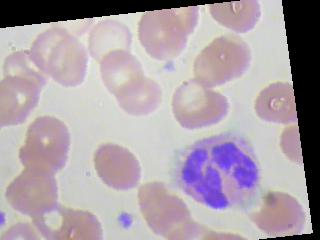

In [6]:
img = PIL.Image.open(glob(f"{PATH}VALIDATION/NEUTROPHIL/*.*")[50]); img

In [8]:
tfms = tfms_from_model(arch, sz, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=None, num_workers=4, test_name='TEST', trn_name='TRAIN', val_name='VALIDATION')
learn = ConvLearner.pretrained(arch, data)
learn.lr_find()

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/module.py:514: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  0%|          | 0/623 [00:00<?, ?it/s]


RuntimeError: invalid argument 2: 3D or 4D (batch mode) tensor expected for input, but got: [16 x 1000] at /home/bmn/src/ai.learn/pytorch/pytorch/aten/src/THCUNN/generic/SpatialAdaptiveMaxPooling.cu:24

In [ ]:
%debug

> /home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/_functions/thnn/pooling.py(470)forward()
    468         backend.SpatialAdaptiveMaxPooling_updateOutput(backend.library_state,
    469                                                        input, output, indices,
--> 470                                                        ctx.output_size[1], ctx.output_size[0])
    471         ctx.save_for_backward(input, indices)
    472         ctx.mark_non_differentiable(indices)

ipdb> ctx
ipdb> ctx.output_size[1]
1
ipdb> ctx.output_size[0]
1
ipdb> input

 7.8075e-01  1.1042e+00 -1.6246e+00  ...  -9.1342e-01  2.8468e+00  2.5543e+00
 7.3164e-01  1.9785e+00 -1.4793e+00  ...   5.7974e-02  1.6401e+00  3.0613e+00
-8.7265e-01  1.1977e+00 -1.2833e+00  ...  -1.4297e+00  1.0589e+00  2.2289e+00
                ...                   ⋱                   ...                
-1.3896e-01  1.9980e+00 -2.4657e+00  ...   3.6889e-01  3.5096e+00  3.3533e+00
 3.0320e-01  1.4286e+00 -6.1444e-01  

In [ ]:
data.classes

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(1e-3, 5)

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
learn.precompute = False
learn.fit(1e-3, 5, cycle_len=2)

In [ ]:
learn.unfreeze()
%time learn.fit([1e-5, 1e-4, 1e-2], 3, cycle_len=1)

In [ ]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [ ]:
plt.hist(row_sz[row_sz<1000]);

In [14]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, num_workers=4, test_name='TEST', trn_name='TRAIN', val_name='VALIDATION')
    return data if sz > 300 else data.resize(sz, 'tmp')

In [ ]:
learn.set_data(get_data(340, bs))

In [ ]:
%time learn.fit([1e-5, 1e-4, 1e-3], 4, cycle_len=2, cycle_mult=2)

In [ ]:
learn.save('blood-cells-classification-resnext_overfitting_bs_16_dropout_60')

In [ ]:
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

In [ ]:
learn.unfreeze()
learn.bn_freeze(True)
%time learn.fit([1e-5, 1e-4, 1e-3], 1, cycle_len=1)

In [ ]:
learn.save('blood-cells-classification-resnext_overfitting_no_aug_bs_16_dropout_80')

In [ ]:
# learn.save('dogbreed_299_resnext_pre_differential_lr')
learn.load('dogbreed_299_resnext_pre_differential_lr')

In [ ]:
learn.load('dogbreed_299_resnext_pre_differential_lr')

In [ ]:
learn.precompute=False
learn.fit(1e-2, 5, cycle_len=1)

In [ ]:
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('dogbreed_299_resnext_post_differential_lr')

In [ ]:
learn.fit(1e-2, 2, cycle_mult=2, cycle_len=2)

In [ ]:
%time log_preds, y = learn.TTA()
metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)
# probs = np.exp(log_preds)

In [ ]:
learn.save('blood_cells_highest_prob_incorrect_validation_set')

In [ ]:
%time test_log_preds, y = learn.TTA()
# metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)
probs = np.exp(test_log_preds)

In [ ]:
preds = np.argmax(test_log_preds, axis=1)
probs = np.exp(test_log_preds)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

In [ ]:
%time log_preds, y = learn.TTA(is_test=True)

In [ ]:
probs = np.exp(log_preds)

In [ ]:
#2:05:20
learn.sched.plot_loss()

In [ ]:
data.test_ds.fnames

In [ ]:
probs.shape

In [ ]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [ ]:
df.head()

In [ ]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w'); 
    c.flush()

In [ ]:
save_array(f'{PATH}preds.bc', df)

In [ ]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.head()

In [ ]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')

In [ ]:
save_array('preds_final.bc', df)